In [99]:
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt # Отрисовка изображений


In [81]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from sklearn.preprocessing import MinMaxScaler 


In [73]:
# number_of_classes = 4
# mypath = 'drive/MyDrive/training2017/'
# onlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f[0] == 'A')]
# bats = [f for f in onlyfiles if f[7] == 'm']
# check = 9000
# mats = [f for f in bats if (np.shape(sio.loadmat(mypath + f)['val'])[1] >= check)]
# size = len(mats)
# print('Training size is ', len(mats))
# X = np.zeros((len(mats), check))
# for i in range(len(mats)):
#     X[i, :] = sio.loadmat(mypath + mats[i])['val'][0, :check]
# print(X.shape)
datasetPath = 'drive/MyDrive/Colab Notebooks/data.csv'
resultPath = 'drive/MyDrive/Colab Notebooks/result.csv'

X = pd.read_csv(datasetPath, delimiter=',')
Y = pd.read_csv(resultPath, delimiter=',')

print(X.shape)
print(Y)


(7560, 9000)
      0.000000000000000000e+00
0                          0.0
1                          0.0
2                          1.0
3                          1.0
4                          0.0
...                        ...
7555                       0.0
7556                       2.0
7557                       0.0
7558                       0.0
7559                       0.0

[7560 rows x 1 columns]


In [82]:
# target_train = np.zeros((len(mats), 1))
# Train_data = pd.read_csv(mypath + 'REFERENCE.csv', sep=',', header=None, names=None)
# for i in range(len(mats)):
#     if Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'N':
#         target_train[i] = 0
#     elif Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'A':
#         target_train[i] = 1
#     elif Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'O':
#         target_train[i] = 2
#     else:
#         target_train[i] = 3
# print(target_train.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)  
# scale_features_std = StandardScaler() 
# x_train = scale_features_std.fit_transform(x_train) 
# x_test = scale_features_std.transform(x_test) 
scale_features_mm = MinMaxScaler() 
x_train = scale_features_mm.fit_transform(x_train) 
x_test = scale_features_mm.transform(x_test)
print(x_train.shape)  
print(y_train.shape)  
print(y_train)


(6048, 9000)
(6048, 1)
      0.000000000000000000e+00
7322                       0.0
6046                       0.0
373                        0.0
1518                       1.0
211                        0.0
...                        ...
500                        1.0
497                        0.0
209                        0.0
5865                       2.0
7193                       0.0

[6048 rows x 1 columns]


In [83]:
y_train = utils.to_categorical(y_train, 4)
y_test = utils.to_categorical(y_test, 4)
print(y_train.shape)

(6048, 4)


In [95]:
def create_model():
  model = Sequential()
  model.add(Dense(1024,input_dim = 9000, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
	#model.add(Dropout(0.5))
	# model.add(Dense(512, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(512, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(512, kernel_initializer='normal', activation='relu'))
	# model.add(Dropout(0.5))
	# model.add(Dense(256, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(256, kernel_initializer='normal', activation='relu'))
	# model.add(Dropout(0.5))
	# model.add(Dense(128, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(128, kernel_initializer='normal', activation='relu'))
	# model.add(Dropout(0.5))
	# model.add(Dense(64, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(64, kernel_initializer='normal', activation='relu'))
	# model.add(Dropout(0.5))
  model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [101]:
# Создаём пустую сеть
model = create_model()

# Обучаем сеть
history = model.fit(x_train, 
          y_train,
          batch_size=8, 
          epochs=10,
          validation_split=0.2, # Указываем 20% случайных примеров для проверочной выборки
          verbose=1)

Epoch 1/10
605/605 [==============================] - 56s 90ms/step - loss: 1.1109 - accuracy: 0.5569 - val_loss: 0.9566 - val_accuracy: 0.5942
Epoch 2/10
605/605 [==============================] - 53s 87ms/step - loss: 0.9721 - accuracy: 0.5903 - val_loss: 0.9622 - val_accuracy: 0.5942
Epoch 3/10
605/605 [==============================] - 52s 87ms/step - loss: 0.9388 - accuracy: 0.6115 - val_loss: 0.9571 - val_accuracy: 0.5942
Epoch 4/10
605/605 [==============================] - 54s 89ms/step - loss: 0.9585 - accuracy: 0.6018 - val_loss: 0.9574 - val_accuracy: 0.5942
Epoch 5/10
605/605 [==============================] - 53s 87ms/step - loss: 0.9594 - accuracy: 0.6003 - val_loss: 0.9567 - val_accuracy: 0.5942
Epoch 6/10
605/605 [==============================] - 53s 87ms/step - loss: 0.9546 - accuracy: 0.5923 - val_loss: 0.9628 - val_accuracy: 0.5942
Epoch 7/10
605/605 [==============================] - 52s 86ms/step - loss: 0.9491 - accuracy: 0.6074 - val_loss: 0.9571 - val_accuracy:

In [102]:
scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

48/48 [==============================] - 2s 31ms/step - loss: 0.9392 - accuracy: 0.6065
[0.9392434358596802, 0.6064814925193787]
Доля верных ответов на тестовых данных, в процентах: 60.6481%


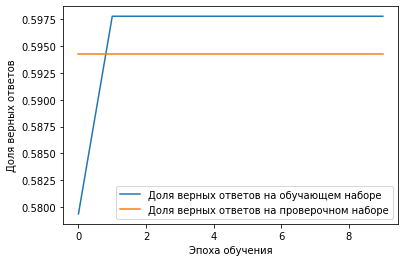

In [103]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

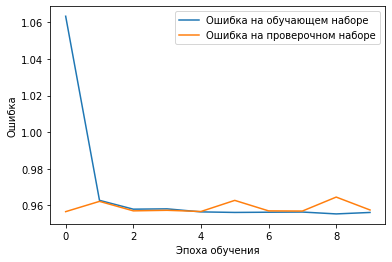

In [105]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()